# Data Cleaning
*How to clean your data to make it ready for analysis and machine learning*

Credit: [The Ultimate Guide to Data Cleaning](https://www.keboola.com/blog/the-ultimate-guide-to-data-cleaning)




In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("hotel_bookings.csv")

This dataset is originally from the article [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191)

### Data Dictionary

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|


In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data cleaning is a 3-step process

### Step 1: Find the dirt

Start data cleaning by determining what is wrong with your data.

Look for the following:

- Are there rows with empty values? Entire columns with no data?  Which data is missing and why?
- How is data distributed? Remember, visualizations are your friends. Plot outliers. Check distributions to see which groups or ranges are more heavily represented in your dataset.
- Keep an eye out for the weird: are there impossible values? Like “date of birth: male”, “address: -1234”.
- Is your data consistent? Why are the same product names written in uppercase and other times in camelCase?

**ตรวจสอบข้อมูลเบื้องต้นด้วย describe()**

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# ทำการ drop column ที่ไม่จำเป็น
df.drop(axis=1, columns=['stays_in_weekend_nights', 'stays_in_week_nights',
                 'days_in_waiting_list', 'previous_cancellations', 'booking_changes',
                 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type',
                 'required_car_parking_spaces', 'total_of_special_requests',
                 'distribution_channel', 'deposit_type'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      119390 non-null  object 
 1   is_canceled                119390 non-null  int64  
 2   lead_time                  119390 non-null  int64  
 3   arrival_date_year          119390 non-null  int64  
 4   arrival_date_month         119390 non-null  object 
 5   arrival_date_week_number   119390 non-null  int64  
 6   arrival_date_day_of_month  119390 non-null  int64  
 7   adults                     119390 non-null  int64  
 8   children                   119386 non-null  float64
 9   babies                     119390 non-null  int64  
 10  meal                       119390 non-null  object 
 11  country                    118902 non-null  object 
 12  market_segment             119390 non-null  object 
 13  is_repeated_guest          11

**ตรวจสอบข้อมูลทั้งหมดว่ามี null value ในแต่ละ column จำนวนเท่าไหร่**

In [6]:
missing = df.isnull().sum()
missing

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
adults,0
children,4
babies,0


**EX: แสดง columns ทั้งหมดที่มี null values เก็บไว้ในตัวแปร**

In [8]:
# CODE HERE
missing_columns = list(missing[missing > 0].index)
missing_columns

['children', 'country', 'agent', 'company']

**EX: ลองคำนวณ % ค่าว่างของทั้ง 4 columns**

In [ ]:
# CODE HERE
missing[missing > 0]

,0
children,4
country,488
agent,16340
company,112593


In [ ]:
missing_df = pd.DataFrame(data=missing[missing > 0], columns=['number_of_missing_values'])
missing_df

,number_of_missing_values
children,4
country,488
agent,16340
company,112593


In [ ]:
missing_df['ratio'] = missing[missing > 0]/len(df) * 100
missing_df

,number_of_missing_values,ratio
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


### Step 2: Scrub the dirt

*Knowing the problem is half the battle. The other half is solving it.*

Depending on the type of data dirt you’re facing, you’ll need different cleaning techniques.

#### 2.1. **Missing data**

Start by spotting all the different disguises missing data wears. It appears in values such as 0, “0”, empty strings, “Not Applicable”, “NA”, “#NA”, None, NaN, NULL or Inf.

Programmers before you might have put default values instead of missing data (“email@company.com”).

When you have a general idea of what your missing data looks like, it is time to answer the crucial question:

*“Is missing data telling me something valuable?”*

There are 3 main approaches to cleaning missing data:
- **Drop rows and/or columns with missing data.**
- **Recode missing data into a different format.**
 - Numerical computations can break down with missing data. Recoding missing values into a different column saves the day. For example, the column “payment_date” with empty rows can be recoded into a column “payed_yet” with 0 for “no” and 1 for “yes”. ‍
- **Fill in missing values with “best guesses.”**

**ตรวจสอบ Data type ในแต่ละ columns ที่มี null values**

In [9]:
for c in missing_columns:
  print(c, ":", df[c].dtype)

children : float64
country : object
agent : float64
company : float64


**EX: ลบ "column" ที่มี null value ออกทั้งหมด (ไม่ save ทับข้อมูลเดิม)**

In [12]:
# CODE HERE
droped_df = df.drop(axis=1, columns=missing_columns).head()

In [11]:
droped_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'adults', 'babies', 'meal',
       'market_segment', 'is_repeated_guest', 'customer_type', 'adr',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**EX: ลบ "ข้อมูล" ออกเฉพาะแถวที่ 'country' เป็นค่า null (inplace = True)**

In [13]:
# CODE HERE
df.dropna(axis=0, subset=['country'], inplace=True)

In [14]:
df.shape[0]

118902

**EX: ตรวจสอบดูข้อมูลแถวที่ `children` เป็น null**

In [15]:
# CODE HERE
df[df['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,is_repeated_guest,agent,company,customer_type,adr,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,2,NaN,0,BB,PRT,Undefined,0,NaN,NaN,Transient-Party,12.0,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,2,NaN,0,BB,PRT,Direct,0,14.0,NaN,Transient-Party,12.0,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,3,NaN,0,BB,PRT,Undefined,0,NaN,NaN,Transient-Party,18.0,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,NaN,0,BB,PRT,Online TA,0,9.0,NaN,Transient-Party,76.5,Canceled,2015-08-09


**EX: เปลี่ยนข้อมูลใน column `children` จาก `np.NaN` ให้เป็น 0 (inplace = True)**

In [16]:
# CODE HERE
df.fillna(value={'children': 0}, inplace=True)

In [17]:
df['children'].isnull().sum()

0

**Ex: แทนค่า null ใน column `agent` และ `company` เป็น string "Unknown" (inplace = True)**

In [18]:
# CODE HERE
df.fillna(value={'agent': 'Unknown', 'company': 'Unknown'}, inplace=True)

In [19]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
adults,0
children,0
babies,0


**Ex: เมื่อลองเช็คค่าของ column `meal` จะเห็นได้ว่ามีค่า "Undefined" โดยจาก data dictionary จะเห็นว่า Undefined/SC หมายถึง no meal package ดังนั้นเราทำการเปลี่ยนค่า "Undefined" เป็น "SC" (inplace = True)**

In [20]:
df['meal'].value_counts()

,count
meal,
BB,91867
HB,14434
SC,10638
Undefined,1165
FB,798


In [ ]:
# CODE HERE
df['meal'].replace('Undefined', 'SC', inplace=True)

In [21]:
df['meal'].value_counts()

,count
meal,
BB,91867
HB,14434
SC,10638
Undefined,1165
FB,798


#### 2.2. **Outliers**

There are three approaches to dealing with outliers:

- **Remove outliers from the analysis.**
 - Remove them by removing the upper and lower X-percentile of your data.
- **Segment data so outliers are in a separate group.**
 - Put all the “normal-looking” data in one group, and outliers in another.
- **Keep outliers, but use different statistical methods for analysis.**
 - Weighted means (which put more weight on the “normal” part of the distribution) and trimmed means are two common approaches of analyzing datasets with outliers, without suffering the negative consequences of outliers.

##### **Handling Outliers with Boxplot**

**ลบ Outliers โดยการคำนวน Quartile 1 , Quartile 3 และ InterQuartile**

![iqr](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

เมื่อลองดูจาก `df.describe()` จะเห็นว่า column `lead_time` มี max = 737 แต่ค่า mean = 104.01

<Axes: >

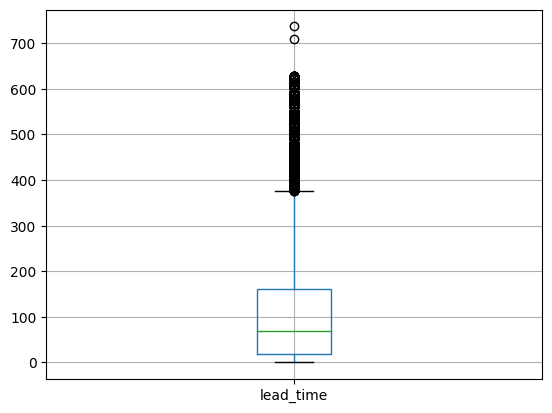

In [22]:
df.boxplot(column=['lead_time'])

In [23]:
cal_Q1 = df["lead_time"].quantile(0.25)
cal_Q3 = df["lead_time"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

143.0

คำนวน lower limit และ upper limite จาก Q1 Q3 และ IQR

In [24]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -196.5 upper: 375.5


In [25]:
df.shape

(118902, 20)

**EX: ตัด Outlier ของ column "lead_time" ออกด้วยโดยใช้ lower_limit และ upper_limit** <br>
ปล. ใช้เทคนิค Row selection แบบ condition

In [26]:
new_df = df[(df['lead_time'] >= lower_limit) & (df['lead_time'] <= upper_limit)]

**EX: ลอง plot boxplot อีกรอบ**

<Axes: >

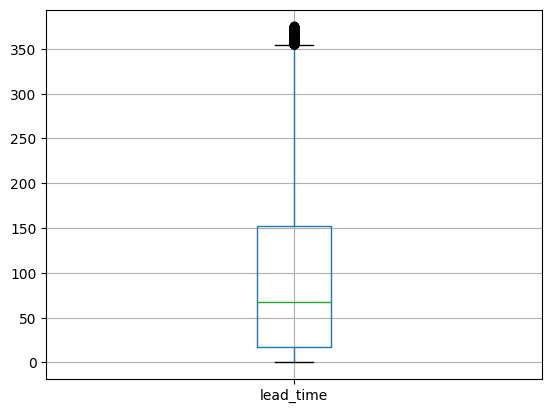

In [27]:
new_df.boxplot(column=['lead_time'])

#### 2.3. **Contaminated or corrupted data**

Contaminated data is another red flag for your collection process. Examples of contaminated data include:

- Wind turbine data in your water plant dataset.
- Purchase information in your customer address dataset.
- Future data in your current event time-series data.

***With corrupted data, there is not much you can do except for removing it. This requires a lot of domain expertise.***

#### 2.4. **Inconsistent data**

“Wait, did we sell ‘Apples’, ‘apples’, or ‘APPLES’ this month? And what is this ‘monitor stand’ for $999 under the same product ID?”

***The best way to spot inconsistent representations of the same elements in your database is to visualize them.***

Plot bar charts per product category. Do a count of rows by category.

In [28]:
# prompt: create a dataframe of 3 columns namely 'name', 'pub_year', 'price' with mock data 5 books from dict

import pandas as pd
# Create a dictionary with book data
book_data = {
    'name': ['Book A', 'Book B', 'Book C', 'Book D', 'Book E'],
    'pub_year': ['2020', '2015-16', '2018?', '2022 or 2023', '2021'],
    'price': [250, 300, 180, 400, 280]
}

# Create the DataFrame
df_books = pd.DataFrame(book_data)

df_books


,name,pub_year,price
0,Book A,2020,250
1,Book B,2015-16,300
2,Book C,2018?,180
3,Book D,2022 or 2023,400
4,Book E,2021,280


In [29]:
extr = df_books['pub_year'].str.extract(r'^(\d{4})', expand=False)
extr

,pub_year
0,2020
1,2015
2,2018
3,2022
4,2021


#### 2.5. **Invalid data**

Similarly to corrupted data, invalid data is illogical. For example, users who spend -2 hours on our app, or a person whose age is 170. Unlike corrupted data, invalid data does not result from faulty collection processes, but from issues with data processing (usually during feature preparation or data cleaning).

‍**Cleaning invalid data mostly means amending the functions and transformations which caused the data to be invalid.**

If this is not possible, we remove the invalid data.

สร้าง column ใหม่ `total_guests` โดยรวมค่าใน column `adults`, `children` และ `babies`

In [30]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

ลองเช็คดูจะเห็นว่ามีค่า 0 ด้วย ซึ่งไม่น่าเป็นไปได้

In [31]:
len(df[df['total_guests'] == 0])

170

**EX: ให้ drop แถวข้อมูลที่มี `total_guests` == 0**

In [32]:
# CODE HERE
new_df = df[df['total_guests'] != 0]

In [33]:
len(new_df[new_df['total_guests'] == 0])

0

#### 2.6. **Duplicate data**
Duplicate data means the same values repeating for an observation point. This is damaging to our analysis because it can either deflate/inflate our numbers (e.g. we count more customers than there actually are, or the average changes because some values are more often represented).

**Cleaning duplicate data means findings the duplicate records and delete all but one.**

In [34]:
dup_df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
dup_df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [35]:
dup_df.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [36]:
dup_df.drop_duplicates(subset=['brand'])

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5


In [37]:
dup_df.drop_duplicates(subset=['brand', 'style'], keep='last')

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
4,Indomie,pack,5.0


#### 2.7. **Data type issues**

Depending on which data type you work with (DateTime objects, strings, integers, decimals or floats), you can encounter problems specific to data types.

**Cleaning string**

Strings are usually the messiest part of data cleaning because they are often human-generated and hence prone to errors.

The common cleaning techniques for strings involve:

- Standardizing casing across the strings
- Removing whitespace and newlines
- Removing stop words (for some linguistic analyses)
- **Hot-encoding** categorical variables represented as strings
- Correcting typos
- Standardizing encodings - everyone has seen strings of the type �����.

**Cleaning date and time**

The cleaning process involves:
- Making sure that all your dates and times are either a DateTime object or a Unix timestamp. Use `df.info()` to check for data type.
- Internationalization and time zones. DateTime objects are often recorded with the time zone or without one.

##### **Hot-hot Encoding**

![onehot](https://ashish1500616.github.io/images/cdohe/mlcdohe5.png)

**ลองเปลี่ยนข้อมูลใน column "meal" ให้เป็นในรูปแบบ one hot**

In [38]:
print(df['meal'].dtype)

object


In [39]:
onehot_column = pd.get_dummies(df["meal"], prefix="meal")
onehot_column

,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
119385,True,False,False,False,False
119386,True,False,False,False,False
119387,True,False,False,False,False
119388,True,False,False,False,False


**EX: ทำการ concat ผลลัพธ์จากการ one hot กับ ช้อมูล original (ไม่ save ทับข้อมูลเดิม)**

In [40]:
# CODE HERE
pd.concat([df, onehot_column], axis=1).head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,...,customer_type,adr,reservation_status,reservation_status_date,total_guests,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined
0,Resort Hotel,0,342,2015,July,27,1,2,0.0,0,...,Transient,0.0,Check-Out,2015-07-01,2.0,True,False,False,False,False
1,Resort Hotel,0,737,2015,July,27,1,2,0.0,0,...,Transient,0.0,Check-Out,2015-07-01,2.0,True,False,False,False,False
2,Resort Hotel,0,7,2015,July,27,1,1,0.0,0,...,Transient,75.0,Check-Out,2015-07-02,1.0,True,False,False,False,False
3,Resort Hotel,0,13,2015,July,27,1,1,0.0,0,...,Transient,75.0,Check-Out,2015-07-02,1.0,True,False,False,False,False
4,Resort Hotel,0,14,2015,July,27,1,2,0.0,0,...,Transient,98.0,Check-Out,2015-07-03,2.0,True,False,False,False,False


#### 2.8. **Standardize and normalize data**

Standardization and normalization are used to rescale your numeric data to a common range (usually between 0 and 1 for normalization).

Credit: [Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

**What is Normalization?**
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

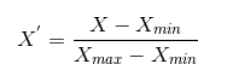

**What is Standardization?**
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

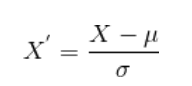


**Normalize or Standardize?**
Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

- **Normalization** is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
- **Standardization**, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data.


***You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.***


**Also, the scaling of target values is generally not required.**

##### Normalization & Standardization

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

**ทดลอง plot histogram ของ column "lead_time" เพื่อดู distribution ของข้อมูล** <br>

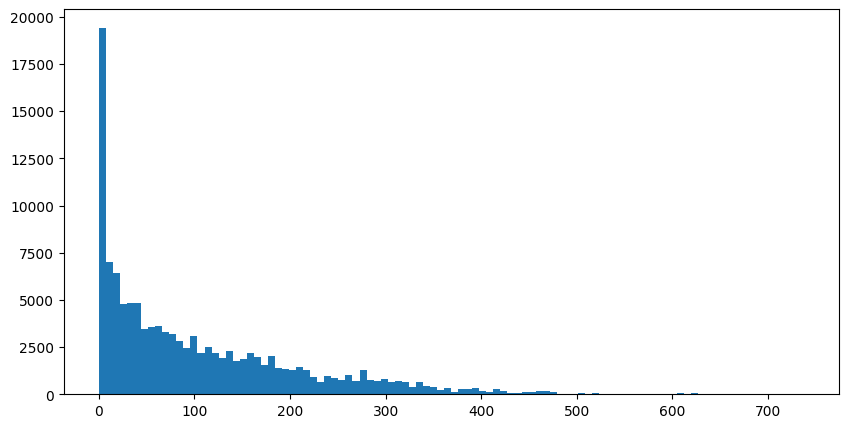

In [42]:
plt.figure(figsize=(10,5))
plt.hist(df["lead_time"], bins=100)
plt.show()

**ทำการ Normalize ข้อมูลจาก column "lead_time" แล้วเก็บในตัวแปรใหม่**

In [43]:
print('Min: ', df["lead_time"].min())
print('Max: ', df["lead_time"].max())
for_transform = df["lead_time"].to_numpy().reshape(-1, 1)
for_transform

Min:  0
Max:  737


array([[342],
       [737],
       [  7],
       ...,
       [ 34],
       [109],
       [205]])

In [44]:
# fit scaler on training data
norm = MinMaxScaler().fit(for_transform)

# transform training data
lead_time_norm = norm.transform(for_transform)
lead_time_norm

array([[0.46404342],
       [1.        ],
       [0.00949796],
       ...,
       [0.04613297],
       [0.14789688],
       [0.27815468]])

**นำข้อมูลที่ได้ Normalize มาทำการ plot histogram อีกครั้ง**

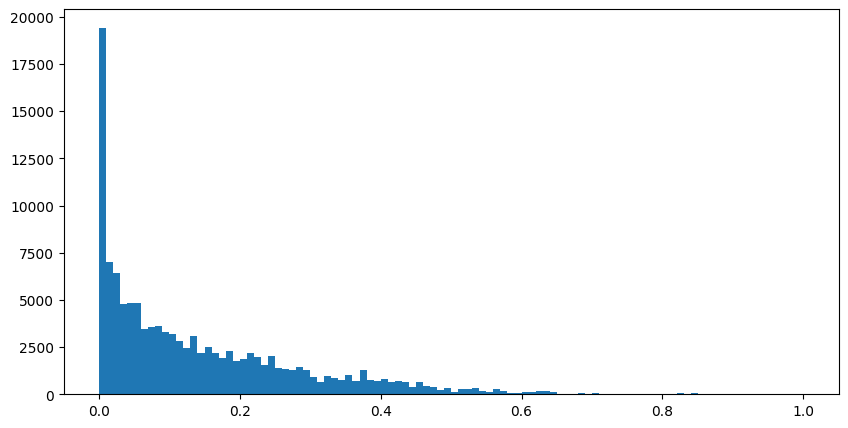

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(lead_time_norm, bins=100)
plt.show()

**เห็นความแตกต่างหรือไม่ ?**

### การทำ Standardize

**EX: ลองทำโดยใช้ `StandardScaler` ดูบ้าง**

In [ ]:
# CODE HERE
scaler = StandardScaler().fit(for_transform)

lead_time_std = scaler.transform(for_transform)
lead_time_std

array([[ 2.22344265],
       [ 5.91839219],
       [-0.91024873],
       ...,
       [-0.65768256],
       [ 0.04389014],
       [ 0.94190319]])

**EX: ลอง plot histogram ดูการกระจายตัวของข้อมูล**

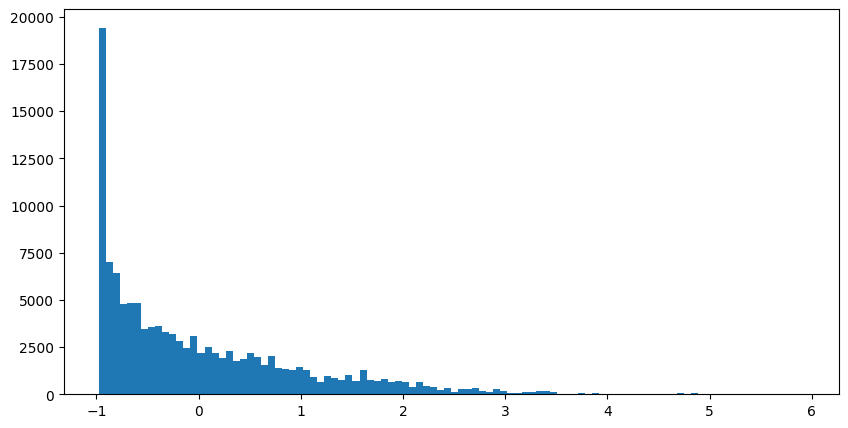

In [ ]:
# CODE HERE
plt.figure(figsize=(10,5))
plt.hist(lead_time_std, bins=100)
plt.show()

### การจัดการกับข้อมูล Date Time

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118902 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      118902 non-null  object 
 1   is_canceled                118902 non-null  int64  
 2   lead_time                  118902 non-null  int64  
 3   arrival_date_year          118902 non-null  int64  
 4   arrival_date_month         118902 non-null  object 
 5   arrival_date_week_number   118902 non-null  int64  
 6   arrival_date_day_of_month  118902 non-null  int64  
 7   adults                     118902 non-null  int64  
 8   children                   118902 non-null  float64
 9   babies                     118902 non-null  int64  
 10  meal                       118902 non-null  object 
 11  country                    118902 non-null  object 
 12  market_segment             118902 non-null  object 
 13  is_repeated_guest          118902 

สร้าง column ใหม่ `arrival_date` ซึ่งเกิดจาก `arrival_date_year`, `arrival_date_month` และ `arrival_date_day_of_month`

In [46]:
df['arrival_date'] = df['arrival_date_day_of_month'].map(str) + ' ' + df['arrival_date_month'] + ' ' + df['arrival_date_year'].map(str)

In [47]:
df['arrival_date'].head()

,arrival_date
0,1 July 2015
1,1 July 2015
2,1 July 2015
3,1 July 2015
4,1 July 2015


แปลงข้อมูล `arrival_date` จาก String ให้อยู่ในรูปแบบ Datetime

In [48]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%d %B %Y')
print(df['arrival_date'].dtype)

datetime64[ns]


In [49]:
df['arrival_date'].loc[:10]

,arrival_date
0,2015-07-01
1,2015-07-01
2,2015-07-01
3,2015-07-01
4,2015-07-01
5,2015-07-01
6,2015-07-01
7,2015-07-01
8,2015-07-01
9,2015-07-01


ดึงข้อมูล วัน เดือน ปี ออกจาก column `arrival_date`

In [50]:
df["arrival_date"].loc[:10].dt.day

,arrival_date
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [51]:
df["arrival_date"].loc[:10].dt.month

,arrival_date
0,7
1,7
2,7
3,7
4,7
5,7
6,7
7,7
8,7
9,7


In [52]:
df["arrival_date"].loc[:10].dt.year

,arrival_date
0,2015
1,2015
2,2015
3,2015
4,2015
5,2015
6,2015
7,2015
8,2015
9,2015


### Step 3: Rinse and repeat

Once cleaned, you repeat steps 1 and 2. This is helpful for three reasons:

1. You might have missed something.
2. Through cleaning, you discover new issues. For example, once you removed outliers from your dataset, you noticed that data is not bell-shaped anymore and needs reshaping before you can analyze it.
3. You learn more about your data.